# TIME SERIES FORECASTING: PREDICTING TESLA STOCK PRICES USING AN LSTM MODEL.

## STEP 1 - Importing Libraries

In [233]:
# Basic Libraries
import math
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline
%pylab inline

# Classification & Model Libaries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Populating the interactive namespace from numpy and matplotlib


## STEP 2 - Loading the Dataset and analysing it

In [234]:
df = pd.read_csv("C:/Users/Aniket/Desktop/PERSONAL PROJECTS/Time Series Forecasting - Predicting Stock Prices using an LSTM model/Dataset/TESLA.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,30-06-2011,5.700,5.866,5.680,5.826,5.826,4733500
1,01-07-2011,5.814,5.920,5.760,5.804,5.804,4274500
2,05-07-2011,5.804,5.904,5.742,5.828,5.828,4980000
3,06-07-2011,5.828,5.828,5.710,5.792,5.792,4634500
4,07-07-2011,5.828,6.000,5.802,5.946,5.946,6639500
5,08-07-2011,5.978,5.978,5.718,5.762,5.762,6203000
6,11-07-2011,5.680,5.706,5.600,5.670,5.670,4879000
7,12-07-2011,5.674,5.818,5.600,5.634,5.634,5227000
8,13-07-2011,5.686,5.806,5.580,5.728,5.728,5330000
9,14-07-2011,5.706,5.792,5.450,5.522,5.522,5795000


In [235]:
print("(Number of rows, Number of columns): ", df.shape)

(Number of rows, Number of columns):  (2516, 7)


In [236]:
print(f"Dataset Columns:\n{df.columns}")

Dataset Columns:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2516 non-null   object 
 1   Open       2516 non-null   float64
 2   High       2516 non-null   float64
 3   Low        2516 non-null   float64
 4   Close      2516 non-null   float64
 5   Adj Close  2516 non-null   float64
 6   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.7+ KB


In [238]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,97.773052,99.900342,95.463121,97.818901,97.818901,3.422191e+07
std,167.251880,171.021091,162.943268,167.302474,167.302474,2.889169e+07
min,4.386000,4.622000,4.300000,4.390000,4.390000,1.198000e+06
25%,34.289999,35.184500,33.525500,34.569499,34.569499,1.611375e+07
50%,47.256000,48.134998,46.435000,47.438000,47.438000,2.752100e+07
75%,65.383999,66.534002,64.374001,65.573500,65.573500,4.285412e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


In [239]:
df_null = df.isnull()
df_null

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2511,False,False,False,False,False,False,False
2512,False,False,False,False,False,False,False
2513,False,False,False,False,False,False,False
2514,False,False,False,False,False,False,False


In [240]:
df_null.sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## STEP 3 - Splitting the data

In [241]:
training_set = df.iloc[:1500, 1:2].values
test_set = df.iloc[1500:, 1:2].values

In [242]:
print(training_set)

[[ 5.7     ]
 [ 5.814   ]
 [ 5.804   ]
 ...
 [73.524002]
 [76.218002]
 [74.5     ]]


In [243]:
print(training_set.shape)

(1500, 1)


In [244]:
print(test_set)

[[ 75.596001]
 [ 75.      ]
 [ 75.334   ]
 ...
 [689.580017]
 [671.640015]
 [684.650024]]


In [245]:
print(test_set.shape)

(1016, 1)


## STEP 4 - Normalizing the data

In [246]:
# Let’s build the input features with a time lag of 1 day (lag 1)

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time-steps and 1 output
X_train = []
Y_train = []
for i in range(60, 1500):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# We have now reshaped the data into the following format: (values, time-steps, 1-dimensional output)

In [247]:
print(X_train)

[[[0.01829268]
  [0.01987972]
  [0.01974051]
  ...
  [0.01119278]
  [0.01032966]
  [0.00991202]]

 [[0.01987972]
  [0.01974051]
  [0.02007462]
  ...
  [0.01032966]
  [0.00991202]
  [0.01277982]]

 [[0.01974051]
  [0.02007462]
  [0.02007462]
  ...
  [0.00991202]
  [0.01277982]
  [0.011332  ]]

 ...

 [[0.67398928]
  [0.66452274]
  [0.67073172]
  ...
  [0.95172066]
  [0.9814289 ]
  [0.93568323]]

 [[0.66452274]
  [0.67073172]
  [0.63935292]
  ...
  [0.9814289 ]
  [0.93568323]
  [0.96249582]]

 [[0.67073172]
  [0.63935292]
  [0.65001667]
  ...
  [0.93568323]
  [0.96249582]
  [1.        ]]]


In [248]:
print(X_train.shape)

(1440, 60, 1)


In [249]:
print(Y_train)

[0.01277982 0.011332   0.011332   ... 0.96249582 1.         0.97608306]


In [250]:
print(Y_train.shape)

(1440,)


## STEP 5 - Building the LSTM model

In [251]:
# Building the LSTM with 50 neurons and 4 hidden layers. 
# Then assigning 1 neuron in the output layer for predicting the normalized stock price.
# Using the MSE loss function and the Adam stochastic gradient descent optimizer.

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [252]:
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
45/45 [==============================] - 5s 16ms/step - loss: 0.0302
Epoch 2/100
45/45 [==============================] - 1s 14ms/step - loss: 0.0051
Epoch 3/100
45/45 [==============================] - 1s 14ms/step - loss: 0.0048
Epoch 4/100
45/45 [==============================] - 1s 14ms/step - loss: 0.0038
Epoch 5/100
45/45 [==============================] - 1s 14ms/step - loss: 0.0037
Epoch 6/100
45/45 [==============================] - 1s 14ms/step - loss: 0.0041
Epoch 7/100
45/45 [==============================] - 1s 14ms/step - loss: 0.0038
Epoch 8/100
45/45 [==============================] - 1s 14ms/step - loss: 0.0041
Epoch 9/100
45/45 [==============================] - 1s 14ms/step - loss: 0.0034
Epoch 10/100
45/45 [==============================] - 1s 14ms/step - loss: 0.0031
Epoch 11/100
45/45 [==============================] - 1s 14ms/step - loss: 0.0041
Epoch 12/100
45/45 [==============================] - 1s 14ms/step - loss: 0.0030
Epoch 13/100
45/45 [=====

45/45 [==============================] - 1s 20ms/step - loss: 9.9024e-04


In [253]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_28 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_29 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_30 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 50)               

In [254]:
print(history.history.keys())

dict_keys(['loss'])


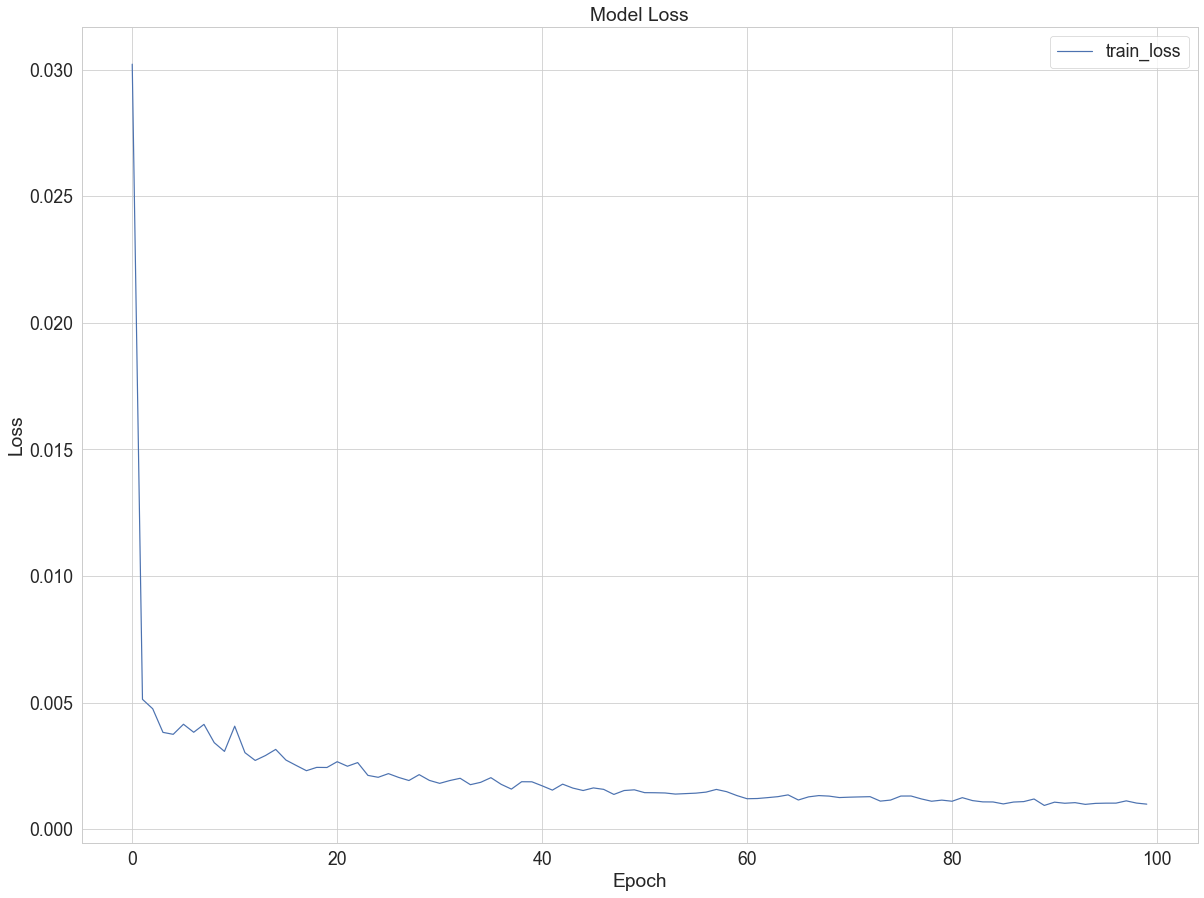

In [265]:
# Plotting Model Loss vs Epochs
sns.set_style("whitegrid")
sns.set_context('paper', font_scale = 2.0)
plot(history.history['loss'])
title('Model Loss')
ylabel('Loss')
xlabel('Epoch')
legend(['train_loss'], loc='upper right')

## STEP 6 - Preparing the Test data

In [261]:
train_dataset = df.iloc[:1500, 1:2]
test_dataset = df.iloc[1500:, 1:2]
total_dataset = pd.concat((train_dataset, test_dataset), axis = 0)

print("Length of total_dataset: ", len(total_dataset))
print("Length of train_dataset: ", len(train_dataset))
print("Length of test_dataset: ", len(test_dataset))

Length of total_dataset:  2516
Length of train_dataset:  1500
Length of test_dataset:  1016


In [262]:
inputs = dataset_total[len(total_dataset) - len(test_dataset) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 1076):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

(1016, 60, 1)


## STEP 7 - Testing the model

In [267]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [268]:
mae = mean_absolute_error(test_dataset.values, predicted_stock_price)
print("Mean Absolute Error (MAE): %f" % mae)

mse = mean_squared_error(test_dataset.values, predicted_stock_price)
print("Mean Squared Error (MSE): %f" % mse)

rmse = mean_squared_error(test_dataset.values, predicted_stock_price)
print("Root Mean Squared Error (MSE): %f" % sqrt(mse))

fe = [test_dataset.values[i]-predicted_stock_price[i] for i in range(len(test_dataset.values))]
mfe = mean(fe)
print('Mean Forecast Error (MFE) or Forecast Bias: %f' % mfe)

Mean Absolute Error (MAE): 67.804472
Mean Squared Error (MSE): 23007.364548
Root Mean Squared Error (MSE): 151.681787
Mean Forecast Error (MFE) or Forecast Bias: 66.861916


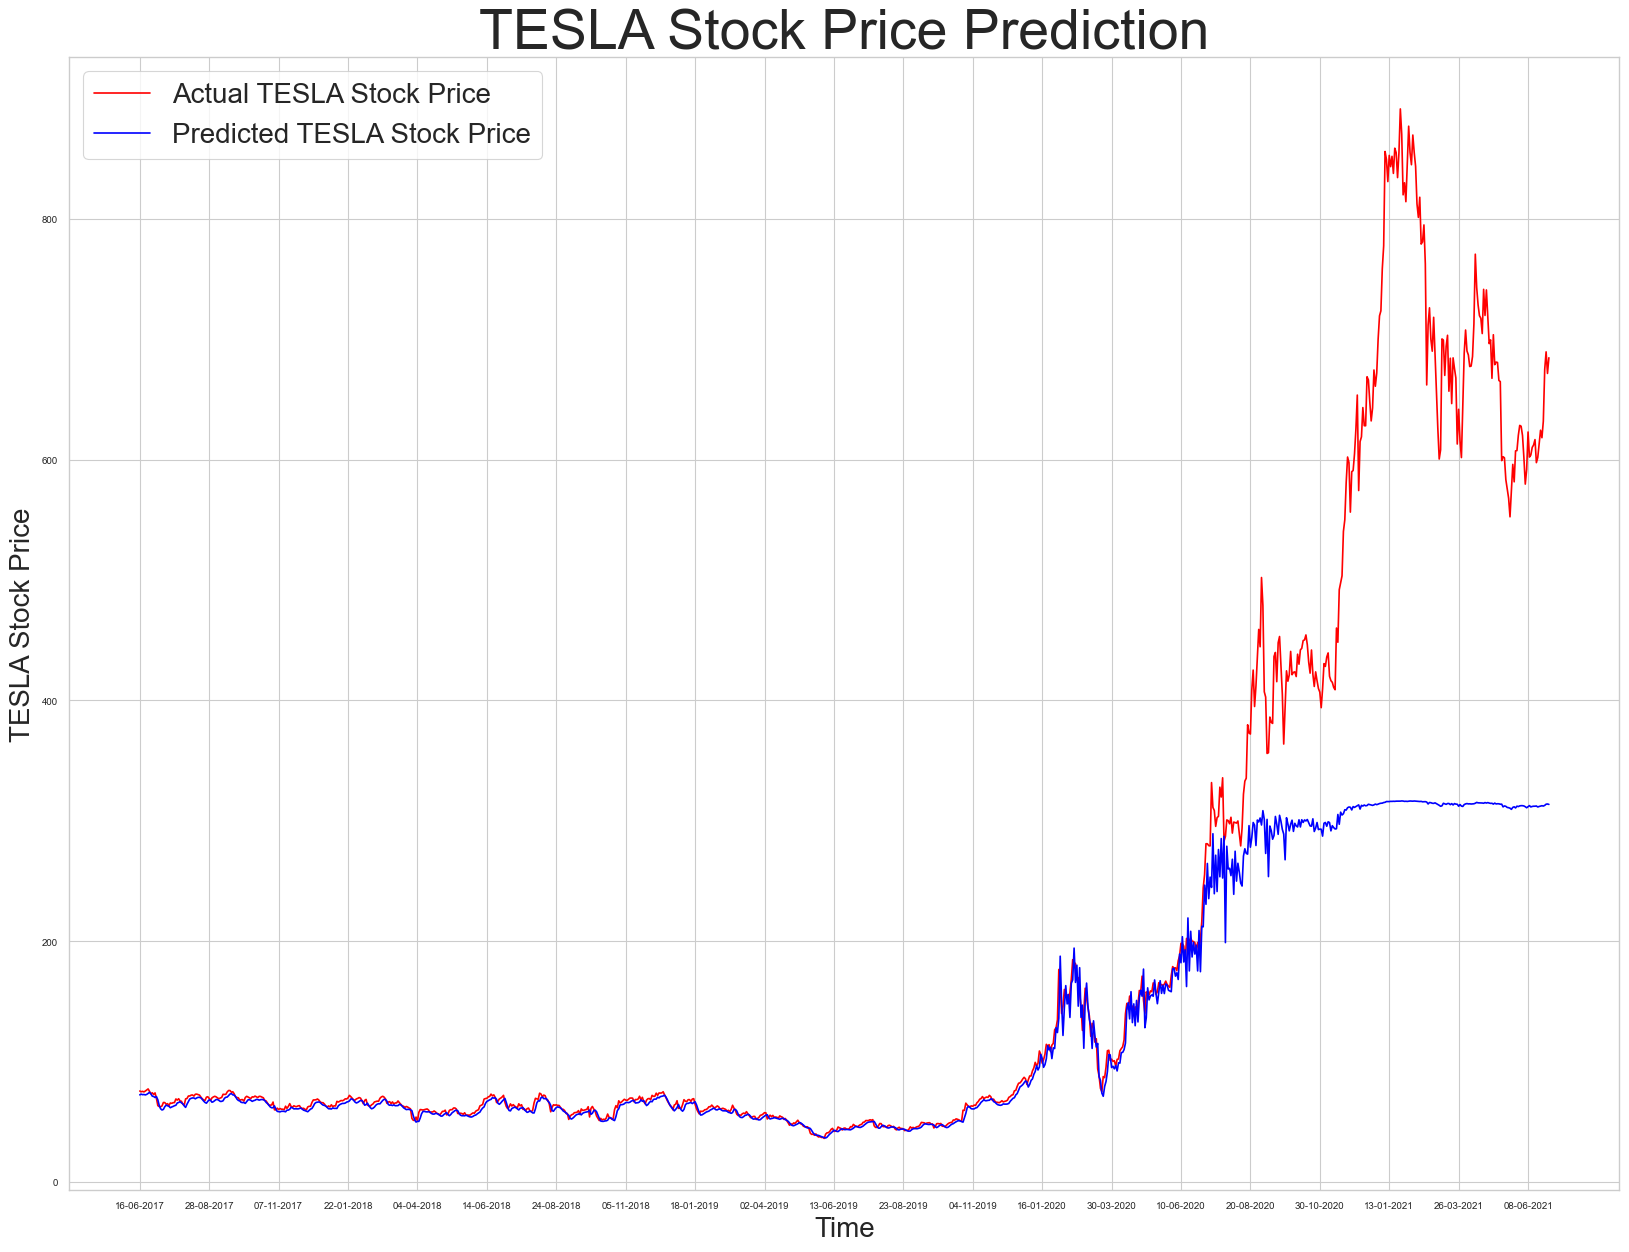

In [269]:
# Visualising the results
sns.set_style("whitegrid")
sns.set_context('paper', font_scale = 0.8)
fig = plt.figure(figsize(20,15), dpi=100)
plt.plot(df.loc[1500:, 'Date'],test_dataset.values, color = 'red', label = 'Actual TESLA Stock Price')
plt.plot(df.loc[1500:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,1016,50))
plt.title('TESLA Stock Price Prediction', fontsize = 40)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('TESLA Stock Price', fontsize = 20)
plt.legend( prop={'size': 20})